<center>
    <a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>    
</center>
<h1 align=center><font size = 5><em>t</em>-SNE</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>November 28, 2024</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

We will work with MNIST dataset.

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

In [3]:
X.shape

(70000, 784)

### Visualize the MNIST dataset using PCA

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

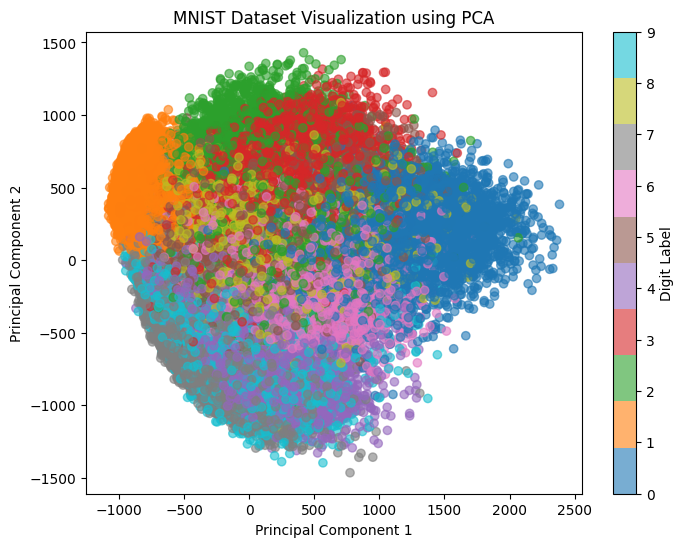

In [5]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Digit Label')
plt.title("MNIST Dataset Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Re-run t-SNE with perplexity=5 and note how the resulting embedding is affected.

In [ ]:
tsne_perplexity5 = TSNE(perplexity=5, random_state=42)
X_tsne_perplexity5 = tsne_perplexity5.fit_transform(X_pca)

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne_perplexity5[:, 0], X_tsne_perplexity5[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Digit Label')
plt.title("t-SNE with Perplexity=5")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

Re-run t-SNE with perplexity=80 and learning_rate = 1000

In [ ]:
tsne_perplexity80_lr1000 = TSNE(perplexity=80, learning_rate=1000, random_state=42)
X_tsne_perplexity80_lr1000 = tsne_perplexity80_lr1000.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne_perplexity80_lr1000[:, 0], X_tsne_perplexity80_lr1000[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Digit Label')
plt.title("t-SNE with Perplexity=80 and Learning Rate=1000")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

Re-run t-SNE with default perplexity and learning_rate = 1000

### Limitations of t-SNE

While t-SNE is a powerful tool for visualizing high-dimensional data, it has several limitations:
- t-SNE struggles with very large datasets due to its computational cost.
- Due to random initialization, different runs can produce slightly different embeddings.
- t-SNE is not suitable for tasks like prediction or feature engineering.
- Results can vary significantly based on perplexity and learning rate.

In [ ]:
data = loadmat("olivettifaces.mat")

In [ ]:
print(data.keys())

In [ ]:
for key, value in data.items():
    print(f"Key: {key}, Type: {type(value)}, Shape: {getattr(value, 'shape', 'N/A')}")

In [ ]:
X = data['faces']  # (4096, 400) - flattened images
X = X.T

In [ ]:
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X)

In [ ]:
for key in ['p', 'u', 'v']:
    print(f"{key}: {data[key].shape}")
    print(data[key])